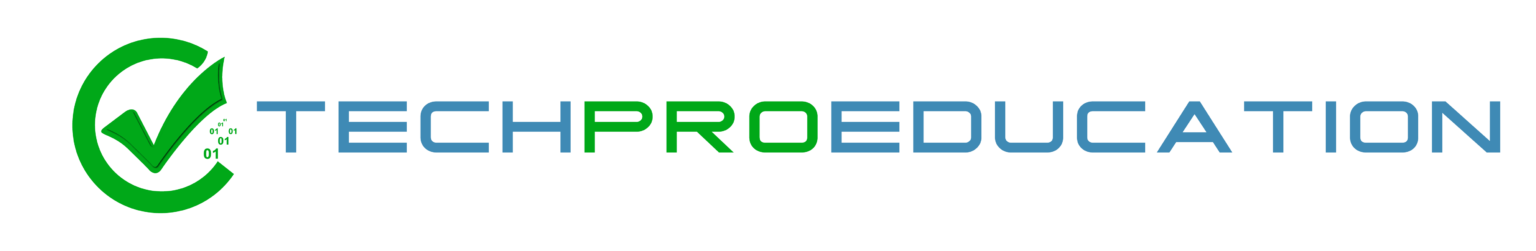

# Hand Written Digits Project

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [13]:
!pip install optuna

     -------------------------------------- 404.2/404.2 kB 1.6 MB/s eta 0:00:00
     ------------------------------------ 225.3/225.3 kB 918.9 kB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 2.2 MB/s eta 0:00:00


+ https://www.kaggle.com/code/chakreshkrsingh/multiclass-classification-using-svm-pca-tsne

Data reference link : https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits


### Read Data

In [5]:
df = pd.read_csv("pendigits_txt.csv")
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


### EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [9]:
df["class"].unique()

array([8, 2, 1, 4, 6, 0, 5, 9, 7, 3], dtype=int64)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


In [10]:
df.corr()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
input1,1.000000,0.347763,0.280842,0.119645,-0.439896,-0.103732,-0.367140,-0.102077,-0.038296,-0.102762,0.189202,-0.106069,0.135265,-0.022685,-0.358122,0.034411,0.352199
input2,0.347763,1.000000,-0.080164,0.214167,-0.310583,-0.255377,-0.320403,-0.383218,-0.080932,-0.306630,0.144516,-0.023232,0.134331,0.124136,-0.134720,0.127604,0.232075
input3,0.280842,-0.080164,1.000000,0.442439,0.416487,0.456945,-0.190123,0.295910,-0.144281,-0.036834,-0.022503,-0.463429,-0.162873,-0.472660,-0.179291,-0.315304,0.243030
input4,0.119645,0.214167,0.442439,1.000000,0.194851,0.675734,-0.036291,0.269129,-0.156279,-0.282295,-0.181192,-0.732677,-0.089374,-0.647705,0.114119,-0.385121,0.183646
input5,-0.439896,-0.310583,0.416487,0.194851,1.000000,0.464945,0.428410,0.356024,-0.223791,0.049201,-0.323276,-0.308267,-0.340178,-0.281341,0.052736,-0.125011,0.039919
input6,-0.103732,-0.255377,0.456945,0.675734,0.464945,1.000000,0.185721,0.779892,-0.036021,0.155711,-0.150013,-0.632538,-0.181143,-0.794761,0.093721,-0.598063,0.153520
input7,-0.367140,-0.320403,-0.190123,-0.036291,0.428410,0.185721,1.000000,0.379678,0.437459,0.354902,-0.161516,0.099955,-0.371791,-0.080724,0.035337,-0.102561,-0.123090
input8,-0.102077,-0.383218,0.295910,0.269129,0.356024,0.779892,0.379678,1.000000,0.295293,0.650526,0.113682,-0.237330,-0.128662,-0.719883,-0.133502,-0.711123,0.108829
input9,-0.038296,-0.080932,-0.144281,-0.156279,-0.223791,-0.036021,0.437459,0.295293,1.000000,0.533213,0.603845,0.291837,-0.067068,-0.097271,-0.390861,-0.268439,-0.170221
input10,-0.102762,-0.306630,-0.036834,-0.282295,0.049201,0.155711,0.354902,0.650526,0.533213,1.000000,0.389667,0.474586,0.023574,-0.215487,-0.335933,-0.454487,-0.044632


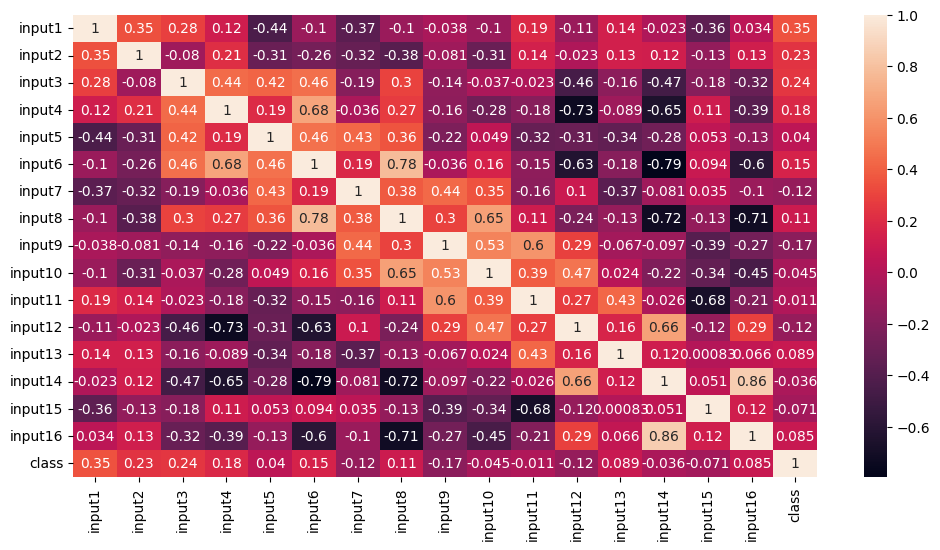

In [17]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(), annot = True);

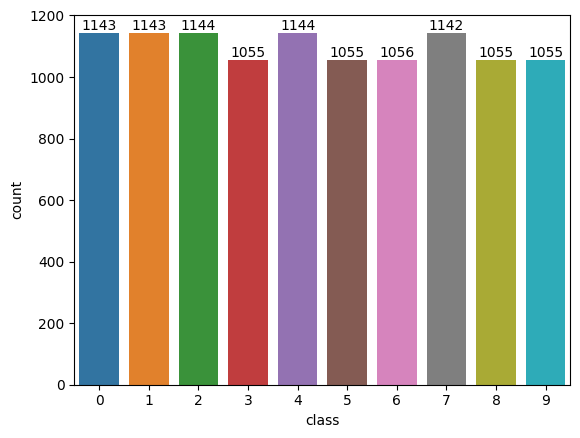

In [19]:
ax= sns.countplot(df["class"])
ax.bar_label(ax.containers[0]); 

In [20]:
from summarytools import dfSummary

dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,input1[int64],Mean (sd) : 38.8 (34.3)min < med < max:0.0 < 32.0 < 100.0IQR (CV) : 59.0 (1.1),101 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACx0lEQVR4nO3dvW/aQBiA8fcgREegtiAUNpaOkTogsbB069g/tmu3DonUOUOXTlkiJMSHcIMwH136oaptsO98zb3R85tzNsOj5LVxzuZ4PAoQu9pTfwCgiLNTP2CMaYrIuePxt8fj8cFxLfDTo6EaY5qXl5fvkiTpuBx8tVrNjTHviRW+Tv1GPU+SpDOZTB7SNN2UOfByubTX19ed2Wx2LiKECi8n//SLiKRpuun3+18djt90WAP8gYspqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUKbTsJFBFyd3JCRSVC705OqKhK0N3JCRWVCrU7ORdTUIFQoQKhQgVChQqEChWivur3vIFcE5GDx+l5PWZEgoa63+8bIpIYY1yW2263+zZN05bLebMse9Vut7/UarXc5eS8HjMuwULNsqyR5/nr4XBYr9frpW4Ai4jkeW5F5Go8Hn/q9XqrMmvv7u46t7e3L0ej0efBYDAve25ejxmfYKFut9sza+3FaDTauMTyPbYLa21e9gbyfD5vioi0Wi3Xm88ivB4zKsFnVNdYfsT2VDzHFubbikV9MfVUfMcW5tvqEepf+IwtzLdhEOojPGZc5tuKEWoAzLfVI9SKMd+GQagVY74Ng1ADYb6tFqFGxnO+FXmmMy6hRsR3vhURWSwWa2PMBxFxWR9t5IQaEd+vne/v71/c3Ny8GQ6HPZfQPSNPDodDw2FdIYQaIZ+vnV1D9408z3O73++vNpvNRxFxfb7inwj1GXIJ3SdykV8PEe12u3rZtUUQKn4T60NE/CsKVCBUqECoUIFQoQKhQgVChQqFbk8tl0tb9sDr9dqKiGRZZqfT6cX/XK/13Fo/t+/6In19A0x2j9+EPhZUAAAAAElFTkSuQmCC"">",0(0.0%)
2,input2[int64],Mean (sd) : 85.1 (16.2)min < med < max:0.0 < 89.0 < 100.0IQR (CV) : 24.0 (5.2),96 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACZklEQVR4nO3dP47aQBiG8W9IlhgWPMJIXCAdewP6pMxhc4QUXCC0VHQWCJngLFrzJ1WiJBJsbOPYr/X8WvYTLh4JZhjtuMvlYkDTdep+AOBfvK37AdAezrmemXULjr9cLpfnay8SKu7COdcbj8efwjAcFZnf7XZb59zna7ESKu6lG4bhaDabPXvvD3kGkyQJ5vP5aLPZdM2MUFE97/1hMpl8LzDau/UiiylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRI4H/445eS1++E5/P54Z7P8ztChZmVv34ny7LgdDo9HQ6HL2ZW5LKJmwgVPxW+fsfMbLVajRaLRf94PL6p4uEIFX8oev3Odru9ef1OWSymIIFQIYFQIYFQIYFQIYFVf8uU2LSvdMO+LEJtkTKb9lVv2JdFqO1SeNO+6g37sgi1hYps2le9YV8WiylIIFRIIFRI4DtqwzT5TGidCLVBmn4mtE6E2iyNPhNaJ0JtoKaeCa0TiylIIFRIIFRI4DtqBdp6gqlOhHpnbT7BVCdCvb/WnmCqE6FeUfbj23u/bdsJpjo1OtSSPyd2zOxccDaIouij9/4x7yAf39V4NVTnXGBm7/7Ds/wtiKLog/d+kHfwdDo9pGn6fjAYLDudTpZ3PsuywMyeptPp1+Fw+C3P7Hq9DpbLZT9Jksc4jl/yzO73+8DMLE3TII7jfp7ZsvN1vneSJMFrf/MDx6Xr/sg2IwMAAAAASUVORK5CYII="">",0(0.0%)
3,input3[int64],Mean (sd) : 40.6 (26.3)min < med < max:0.0 < 40.0 < 100.0IQR (CV) : 38.0 (1.5),101 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACy0lEQVR4nO3dsU7bQBzH8d8lBDmAHEW0YWPpWKlDRh6iD9tHKBJPkIGlExtSFDnCJYpx0qEUUTUq8Z0N9z++n5lzMnxjx3dc7LbbrYDY9d76DQD7OHjpD5xzQ0mHnsdfb7fbe8+xwJP/huqcG56enn7N83zsc/Dlcrlwzn0jVoR66Yx6mOf5+OLi4n40Gq2aHLgoiuzq6mo8n88PJREqgrx46Zek0Wi0mkwmPz2OP/QYA/yDmymYQKgwgVBhwl7fUS0KnFaTfn+IN55jmZZrWZKhhk6r1XU9KMvy08nJyY9er1c1Hc+0XPuSDFUB02qSdHNzM57NZh+n0+n12dnZosnYoiiyy8vLyXw+/+CcWzZ9bXE23inVUCX5T6stFouhJB0fHzceX5bloKqqL+fn5/1+v9/4Q8LZeLekQ30L6/X6IMuyo+l0uvI5G7NIshuhdsTnbPyIRZIdmJ6CCYQKEwgVJhAqTCBUmBD1XX/AMmi+2WwGbb8fvJ1oQw1ZBq2qKqvr+vNqtfouyWeKCJGJNlQFLIM+LoEePTw89Lt6c3hdMYcqyW8Z9M8SKNLBzRRMIFSYQKgwgVBhAqHChOjv+t+buq4HknLnnO8hktwhQKgRCd0dIKW7Q4BQIxKyO0BKe4dAp6EGXsbe7Xp9wO4AKdEdAp2FGnoZY70ez3UWauhljPV6PNf5d1Tfyxjr9XiOeVSYQKgwgVBhAqHCBEKFCYQKEwgVJrDWn5jAZeto//OKUBOS8m+zEmpCUv5tVkJNUIq/zcrNFEzgjIrWdPkkckJFK7p+Ejmhoi2dPomcUNGqrp5Ezs0UTCBUmECoMIHvqHgS8/Z2QoWk+Le3Eyokxb+9nVDxl1i3t3MzBRMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUm7LWEWhRF1vTAd3d3mSSVZZnd3t4eveZ4q69t9X2Hjt+nr1+IZbC1nN+WrgAAAABJRU5ErkJggg=="">",0(0.0%)
4,input4[int64],Mean (sd) : 83.8 (19.2)min < med < max:0.0 < 91.0 < 100.0IQR (CV) : 28.0 (4.4),98 distinct values,"<img src = ""data

ValueError: num must be 1 <= num <= 9, not 10

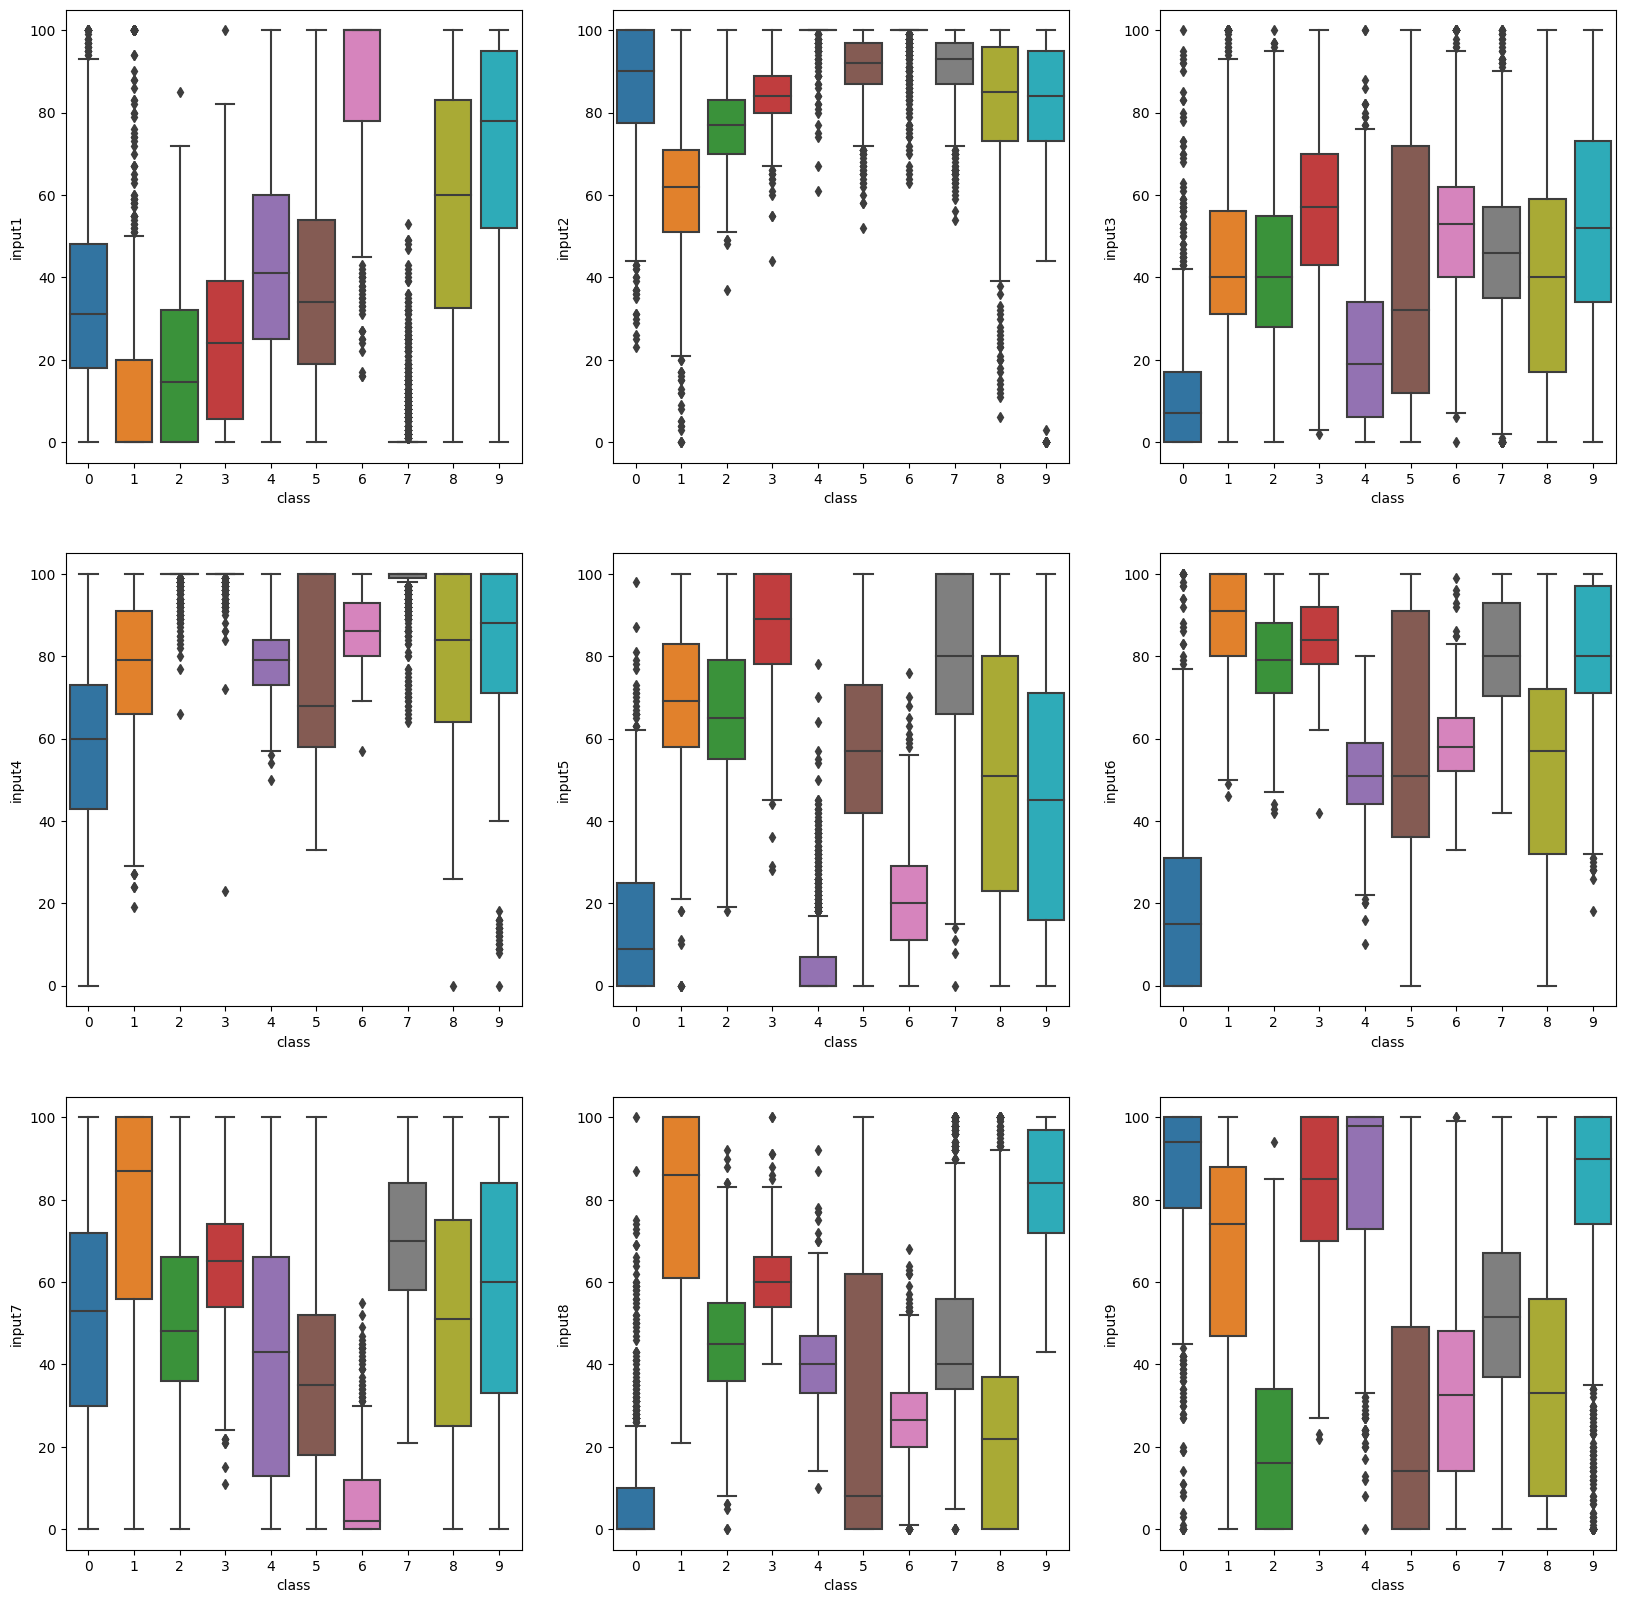

In [22]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='class',y=feature,data=df)
plt.show()

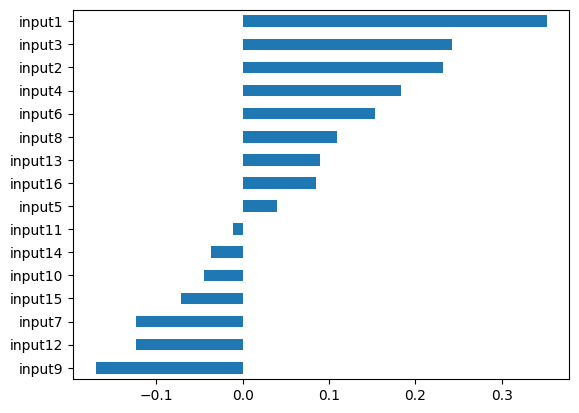

In [23]:
df.corr()["class"].drop("class").sort_values().plot.barh()
plt.show()

In [25]:
# Veri setindeki yinelenen gözlemleri kontrol eder ve bunları kaldırır

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")
        
duplicate_values(df)        

Duplicate check...
There are no duplicated observations in the dataset.


# Train, Test, Split with Skitlearn

In [23]:
X = df.drop('class',axis=1)
y = df['class']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.15, 
                                                    shuffle=False)

# random_state=101: shuffle=False olduğunda, random_state seçeneğinin bir etkisi olmaz çünkü veri karıştırılmaz 
# (shuffled). Bu nedenle, bu seçeneği kaldırabilirsiniz.

## Random Forrest

### Basic Model

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[160   0   0   0   0   0   0   0   2   0]
 [  0 162   5   0   0   0   0   1   0   0]
 [  0   1 171   0   0   0   0   0   0   0]
 [  0   0   0 170   0   0   0   0   0   0]
 [  0   0   0   0 179   0   0   0   0   0]
 [  0   0   0   4   0 152   0   0   0   2]
 [  0   0   0   0   0   0 160   0   0   0]
 [  0   2   1   0   0   0   0 156   0   0]
 [  0   0   0   0   0   0   0   0 150   0]
 [  0   0   0   0   0   0   0   1   1 169]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       162
           1       0.98      0.96      0.97       168
           2       0.97      0.99      0.98       172
           3       0.98      1.00      0.99       170
           4       1.00      1.00      1.00       179
           5       1.00      0.96      0.98       158
           6       1.00      1.00      1.00       160
           7       0.99      0.98      0.98       159
           8       0.98      1.00      0.99       150
           9       

In [26]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring = ["accuracy", 
                                   "precision_micro", 
                                   "recall_micro", 
                                   "f1_micro"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.99058
test_precision_micro    0.99058
test_recall_micro       0.99058
test_f1_micro           0.99058
dtype: float64

In [99]:
pruned_tree = RandomForestClassifier()
pruned_tree.fit(X_train,y_train)

RandomForestClassifier()



Test Set
[[184   0   0   0   1   0   0   0   0   0]
 [  0 176   2   1   0   0   1   0   0   0]
 [  0   1 186   0   0   0   0   0   0   0]
 [  0   0   0 163   0   0   0   1   0   0]
 [  0   0   0   0 165   0   0   0   0   1]
 [  0   0   0   1   0 153   0   0   0   1]
 [  0   0   0   0   0   0 149   0   0   0]
 [  0   0   0   0   0   0   0 186   0   1]
 [  0   0   0   0   0   0   0   0 147   0]
 [  0   0   0   0   1   0   0   1   0 142]]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       185
           1       0.99      0.98      0.99       180
           2       0.99      0.99      0.99       187
           3       0.99      0.99      0.99       164
           4       0.99      0.99      0.99       166
           5       1.00      0.99      0.99       155
           6       0.99      1.00      1.00       149
           7       0.99      0.99      0.99       187
           8       1.00      1.00      1.00       147
           9   

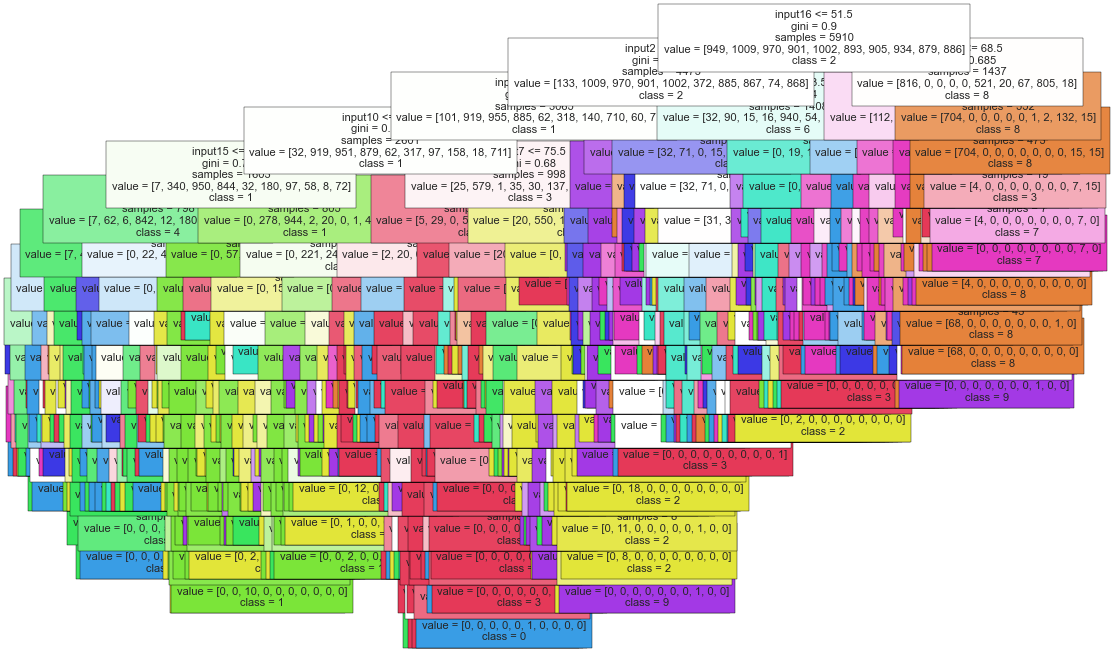

In [100]:
report_model(pruned_tree)

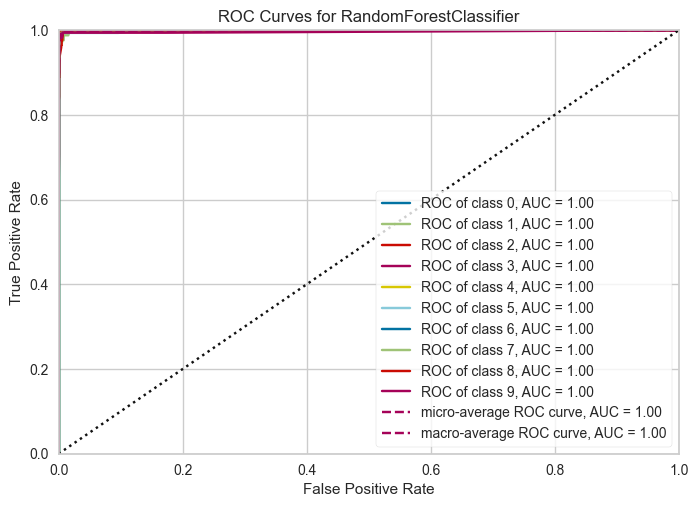

In [33]:
# Multi-class verilerde yellowbrick kullanıyoruz.

from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

### GridSearch

In [35]:
param_grid = {'n_estimators':[50, 64, 100, 128, 300],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[2, 3, 4, "sqrt", "log2"],
             'max_depth':[3, 7, 9, 8],
             'min_samples_split':[2, 6, 8]}

In [36]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, 
                             scoring = "accuracy", 
                             n_jobs = -1, 
                             verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [72]:
rf_grid_model.best_params_

{'max_depth': 9,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [73]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[184   0   0   0   1   0   0   0   0   0]
 [  0 169   7   4   0   0   0   0   0   0]
 [  0   2 185   0   0   0   0   0   0   0]
 [  0   0   0 163   0   0   0   1   0   0]
 [  0   0   0   0 165   0   0   0   0   1]
 [  0   0   0   3   0 151   0   0   0   1]
 [  0   0   0   0   0   0 149   0   0   0]
 [  0   1   0   0   0   0   0 185   1   0]
 [  0   0   0   0   0   0   0   1 146   0]
 [  0   1   0   0   1   0   0   0   0 142]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       185
           1       0.98      0.94      0.96       180
           2       0.96      0.99      0.98       187
           3       0.96      0.99      0.98       164
           4       0.99      0.99      0.99       166
           5       1.00      0.97      0.99       155
           6       1.00      1.00      1.00       149
           7       0.99      0.99      0.99       187
           8       0.99      0.99      0.99       147
           9       

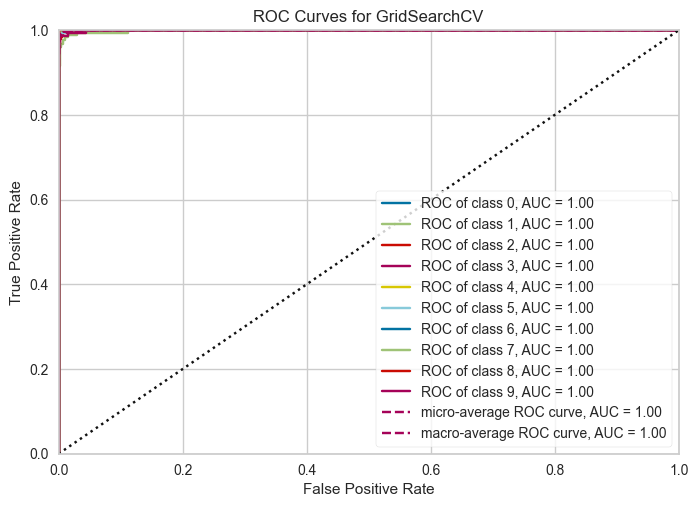

In [93]:
# Multi-class verilerde yellowbrick kullanıyoruz.

from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_grid_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();  

## SVC

### Basic Model

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix;

In [81]:
operations = [("scaler", StandardScaler()), 
              ("SVC", SVC(random_state=101))]

pipe_model = Pipeline(steps=operations)

In [82]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[184   0   0   0   0   0   1   0   0   0]
 [  0 178   0   2   0   0   0   0   0   0]
 [  0   0 187   0   0   0   0   0   0   0]
 [  0   0   1 163   0   0   0   0   0   0]
 [  0   0   0   0 166   0   0   0   0   0]
 [  0   0   0   1   0 154   0   0   0   0]
 [  0   0   0   0   0   0 149   0   0   0]
 [  0   0   0   0   0   0   0 187   0   0]
 [  0   0   0   0   0   0   0   0 147   0]
 [  0   1   0   0   0   0   0   1   0 142]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       185
           1       0.99      0.99      0.99       180
           2       0.99      1.00      1.00       187
           3       0.98      0.99      0.99       164
           4       1.00      1.00      1.00       166
           5       1.00      0.99      1.00       155
           6       0.99      1.00      1.00       149
           7       0.99      1.00      1.00       187
           8       1.00      1.00      1.00       147
           9       

In [95]:
scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train, 
                        scoring = ['accuracy'], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()

fit_time         1.346796
score_time       0.093606
test_accuracy    0.994211
dtype: float64

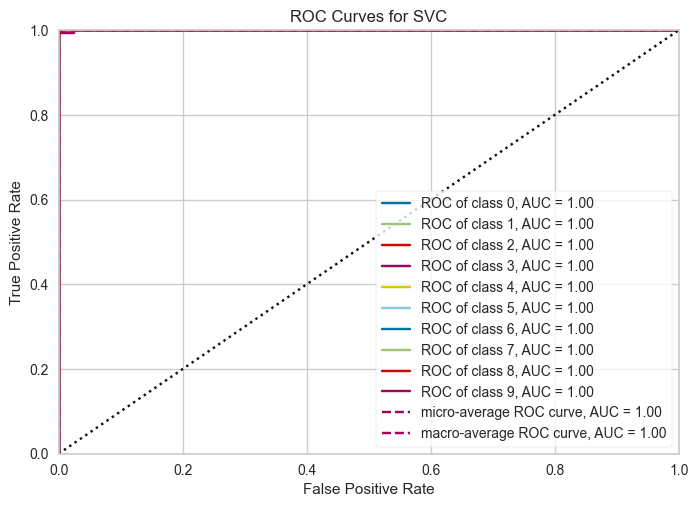

In [97]:
# Multi-class verilerde yellowbrick kullanıyoruz.

from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier()
visualizer = ROCAUC(pipe_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();   

### Gridsearch

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear']}

# pipe_model parametreleri olduğu gibi verelim.

In [85]:
operations = [("scaler", StandardScaler()),
              ("SVC", SVC(probability=True, 
                          class_weight="balanced", 
                          random_state=101))]

pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, 
                              param_grid, 
                              scoring="accuracy", 
                              cv=10,
                              n_jobs = -1, 
                              verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


In [86]:
svm_model_grid.best_params_

{'SVC__C': 0.1, 'SVC__gamma': 0.2, 'SVC__kernel': 'rbf'}

In [87]:
pd.DataFrame(svm_model_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVC__C,param_SVC__gamma,param_SVC__kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,170.275868,2.327315,3.543504,0.256676,0.001,scale,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 'scale', 'SVC_...",0.101822,0.101822,...,0.105038,0.105038,0.105038,0.105038,0.105038,0.163090,0.097639,0.109674,0.017986,29
1,46.622681,3.102692,1.210707,0.290959,0.001,scale,linear,"{'SVC__C': 0.001, 'SVC__gamma': 'scale', 'SVC_...",0.901393,0.915327,...,0.900322,0.885316,0.905681,0.901393,0.854234,0.845494,0.880901,0.889467,0.021975,24
2,188.474420,8.488691,3.588833,0.335110,0.001,auto,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 'auto', 'SVC__...",0.101822,0.101822,...,0.105038,0.105038,0.105038,0.105038,0.105038,0.163090,0.097639,0.109674,0.017986,29
3,46.931124,1.366074,1.046864,0.167057,0.001,auto,linear,"{'SVC__C': 0.001, 'SVC__gamma': 'auto', 'SVC__...",0.901393,0.915327,...,0.900322,0.885316,0.905681,0.901393,0.854234,0.845494,0.880901,0.889467,0.021975,24
4,159.934990,1.948964,3.475356,0.328031,0.001,0.2,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 0.2, 'SVC__ker...",0.101822,0.101822,...,0.105038,0.105038,0.105038,0.105038,0.105038,0.095494,0.097639,0.102700,0.003345,31
5,42.162033,2.762292,0.912356,0.122556,0.001,0.2,linear,"{'SVC__C': 0.001, 'SVC__gamma': 0.2, 'SVC__ker...",0.901393,0.915327,...,0.900322,0.885316,0.905681,0.901393,0.854234,0.845494,0.880901,0.889467,0.021975,24
6,148.335539,5.249307,3.025162,0.227404,0.001,0.3,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 0.3, 'SVC__ker...",0.101822,0.101822,...,0.105038,0.105038,0.105038,0.105038,0.105038,0.095494,0.097639,0.102700,0.003345,31
7,38.211280,1.782425,0.963981,0.188974,0.001,0.3,linear,"{'SVC__C': 0.001, 'SVC__gamma': 0.3, 'SVC__ker...",0.901393,0.915327,...,0.900322,0.885316,0.905681,0.901393,0.854234,0.845494,0.880901,0.889467,0.021975,24
8,29.465615,0.837492,1.517324,0.135877,0.05,scale,rbf,"{'SVC__C': 0.05, 'SVC__gamma': 'scale', 'SVC__...",0.975348,0.980707,...,0.978564,0.969989,0.973205,0.971061,0.949625,0.964592,0.956009,0.969445,0.009453,15
9,7.569942,0.321283,0.350484,0.088361,0.05,scale,linear,"{'SVC__C': 0.05, 'SVC__gamma': 'scale', 'SVC__...",0.977492,0.979636,...,0.982851,0.969989,0.984995,0.978564,0.954984,0.964592,0.963519,0.973626,0.009330,10


In [88]:
svm_model_grid.best_index_

28

In [89]:
svm_model_grid.best_score_

0.9871348136290244

In [90]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[182   0   0   0   0   0   1   0   2   0]
 [  0 176   2   2   0   0   0   0   0   0]
 [  0   1 186   0   0   0   0   0   0   0]
 [  0   0   0 163   0   0   0   1   0   0]
 [  0   0   0   0 166   0   0   0   0   0]
 [  0   1   0   2   0 152   0   0   0   0]
 [  0   0   0   0   0   0 149   0   0   0]
 [  0   0   0   0   0   0   0 187   0   0]
 [  0   0   0   0   0   0   0   1 146   0]
 [  0   1   0   0   0   0   0   1   0 142]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       185
           1       0.98      0.98      0.98       180
           2       0.99      0.99      0.99       187
           3       0.98      0.99      0.98       164
           4       1.00      1.00      1.00       166
           5       1.00      0.98      0.99       155
           6       0.99      1.00      1.00       149
           7       0.98      1.00      0.99       187
           8       0.99      0.99      0.99       147
           9       

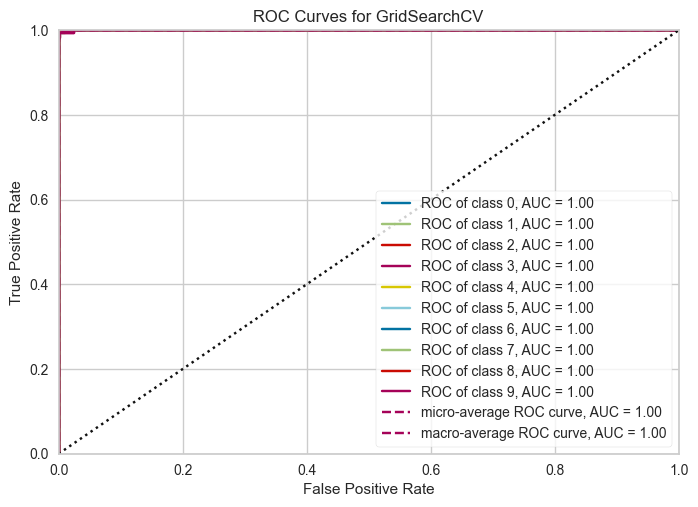

In [96]:
# Multi-class verilerde yellowbrick kullanıyoruz.

from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier()
visualizer = ROCAUC(svm_model_grid)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();      

# PCA

### RF and SVC Modellings

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Extracting features and target variable from the initial notebook
X = df.drop("class", axis=1)
y = df["class"]

# 1. Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Applying PCA
pca = PCA(n_components=0.95)  # Retaining 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# 3. Splitting the data into training and testing sets (using previously discussed strategy)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.15, shuffle=False)

# Training and evaluating Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
rf_preds = rf.predict(X_test_pca)
rf_accuracy = accuracy_score(y_test, rf_preds)

# Training and evaluating SVC
svc = SVC()
svc.fit(X_train_pca, y_train)
svc_preds = svc.predict(X_test_pca)
svc_accuracy = accuracy_score(y_test, svc_preds)

rf_accuracy, svc_accuracy


(0.9848392965433597, 0.9896907216494846)

### Ramdom Forrest GridSearch

In [10]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters for Random Forest
rf_params = {
    'n_estimators': [50, 64, 100, 128],
    'max_depth': [None, 3, 7, 13],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=100, n_jobs=-1)
rf_grid.fit(X_train_pca, y_train)

# Best parameters and score for Random Forest
rf_best_params = rf_grid.best_params_
rf_best_score = rf_grid.best_score_

rf_best_params, rf_best_score



({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.9840518040971498)

### SVC GridSearch

In [ ]:
# Hyperparameters for SVC
svc_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# GridSearchCV for SVC
svc_grid = GridSearchCV(SVC(), svc_params, cv=10, n_jobs=-1)
svc_grid.fit(X_train_pca, y_train)

# Best parameters and score for SVC
svc_best_params = svc_grid.best_params_
svc_best_score = svc_grid.best_score_

svc_best_params, svc_best_score


# Conclusion

+ Veri seti multi-class balenced.

+ Aynı yazarın girişlerinin hem train, hem de test datası olarak kullanılması riski nedeniyle, data leakage'ı önlemek için s"huffle=False" ile train, test, spltr yapıldı.. 

+ Hem RF, hem de SVC'in skorları (basic ve GridSearchCV'de) yüksek çıktı, ama SVC  çık az farkla daha iyi bir skora sahip.

+ PCA uyguladığımızda da SVC çok az bir farkla daha iyi.

+ Ancak modelin çalışma süreleri açısında mukayese edildiğinde RF daha kısa sürece sonucu döndürdü.

+ **Sonuç olarak benim tercihim SVC'dir.**

# Draft Codes

### Ramdom Forrest Optuna

In [ ]:
# Optuna için gerekli kütüphaneyi import edin
import optuna
import logging

# Optuna'nın log seviyesini WARNING olarak ayarla
optuna.logging.set_verbosity(optuna.logging.WARNING)

from sklearn.model_selection import cross_val_score

# Objective fonksiyonunu tanımlayın
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 64, 100, 128)
    max_depth = trial.suggest_int("max_depth", 3, 13, log=True)
    min_samples_split = trial.suggest_float("min_samples_split", 0.1, 1)
    min_samples_leaf = trial.suggest_float("min_samples_leaf", 0.1, 0.5)
    max_features = trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"])

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        n_jobs=-1,
    )

    return cross_val_score(clf, X_train_pca, y_train, n_jobs=-1, cv=10).mean()

# Optuna study nesnesini oluşturun ve optimizasyonu başlatın
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# En iyi parametreleri ve skoru yazdırın
best_score_ = study.best_trial.value
print("Best trial:")
trial = study.best_trial
print("  Accuracy: ", best_score_)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")



### SVC Optuna

In [ ]:
# SVC için objective fonksiyonunu tanımlayın
def svc_objective(trial):
    C = trial.suggest_float("C", 1e-10, 1e10, log=True)
    gamma = trial.suggest_float("gamma", 1e-10, 1e10, log=True)
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])

    svc = SVC(C=C, gamma=gamma, kernel=kernel)

    return cross_val_score(svc, X_train_pca, y_train, n_jobs=-1, cv=10).mean()

# Optuna study nesnesini oluşturun ve SVC için optimizasyonu başlatın
svc_study = optuna.create_study(direction="maximize")
svc_study.optimize(svc_objective, n_trials=100)

# En iyi parametreleri ve skoru yazdırın
print("Best trial for SVC:")
trial = svc_study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


Verdiğiniz bilgilere dayanarak, çeşitli nedenlerle `cross_validate` fonksiyonunun `NaN` değerler döndüğünü görebiliriz. Bunlar arasında en yaygın olan nedenler şunlardır:

1. **Multiclass Sorunu**: Özellikle 'precision', 'recall' ve 'f1' gibi metrikler multiclass (çok sınıflı) sınıflandırma için doğrudan tanımlı değildir. Ölçüm metrikleri bu durumda 'micro', 'macro', 'weighted' veya 'samples' olarak belirtilebilir. Örneğin:
   - `scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']`
   
2. **Veri Dağılımı**: Eğer eğitim setinizde bazı sınıflar için hiç örnek yoksa (örneğin, bazı katlamalarda belirli bir sınıfın örnekleri eksik olabilir) bu, metrik hesaplama sırasında hatalara neden olabilir.

3. **Model Hataları**: Eğer modeliniz bazı katlamalarda eğitilemiyorsa veya tahminde bulunamıyorsa, bu da `NaN` değerlere yol açabilir.

4. **Scikit-learn Sürümü**: Bazen kütüphanelerin eski sürümlerinde bazı hatalar veya uyumsuzluklar olabilir. Bu tür sorunlar genellikle güncellemelerle düzeltilir.

NaN değerlerini gidermek için şunları deneyebilirsiniz:

1. Scoring metriklerini multiclass uyumlu hale getirin (örneğin, 'precision_macro' kullanarak).
2. Veri dağılımını kontrol edin. Stratified k-fold cross-validation kullanmayı deneyin. Bu, her katlamada sınıf dağılımının eşit olduğundan emin olmanıza yardımcı olabilir.
3. Modelinizin eğitim sırasında herhangi bir hata verip vermediğini kontrol edin.
4. Scikit-learn kütüphanesinin en son sürümünü kullanıp kullanmadığınızı kontrol edin.

Umarım bu bilgiler sorununuzu çözmenize yardımcı olur. Eğer sorun devam ederse, daha fazla detay verirseniz size daha spesifik yardımcı olabilirim.